In [1]:
setwd(here::here())

In [2]:
getwd()

[1] "/net/mraid14/export/tgdata/users/markusm/exe-gastrulation"

In [3]:
library("Matrix")
library("dplyr")
library("metacell")



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [4]:
scdb_init("scrna_db", force_reinit=T)
scfigs_init("figs/")

initializing scdb to scrna_db



In [5]:
mat_name = "embexe_with_e45"
ignore_embryos = c("EXE1_E2","190304_TKO_1_P6")

metadata = read.table("data/list_of_wt_plates.tsv",sep = "\t")


metadata$Amp.Batch.ID = metadata$Plate
metadata$Seq.Batch.ID = metadata$Sequencing.Dates
metadata$Batch.Set.ID = metadata$Amp.Batch.ID

write.table(x = metadata,file = paste("config/key_",mat_name,".txt",sep = ""),quote = F,sep = "\t",row.names = F)

In [6]:
mcell_import_multi_mars(mat_nm = mat_name,
                        dataset_table_fn = paste("config/key_",mat_name,".txt",sep = ""),
                        base_dir = "data/umi.tables/mars_seq/",
                        patch_cell_name=T,
                        force=TRUE)

will read 181209_P01

will read 181209_P03

will read 181209_P04

will read 190214_P01

will read 190214_P02

will read 190214_P03

will read 190214_P04

will read 190214_P05

will read 190223_P01

will read 190223_P02

will read 190223_P03

will read 190223_P04

will read 190223_P05

will read 190223_P06

will read 190223_P07

will read 190223_P08

will read 190223_P09

will read 190223_P10

will read 190304_P01

will read 190304_P02

will read 190304_P03

will read 190307_P09

will read 190307_P10

will read 190307_P11

will read 190307_P12

will read 190307_P13

will read 190307_P14

will read 190307_P15

will read 190307_P16

will read 190311_P01

will read 190311_P02

will read 190311_P03

will read 190313_P01

will read 190313_P02

will read 190313_P03

will read 190313_P04

will read 190313_P05

will read 190313_P06

will read 190313_P07

will read 190313_P08

will read 190313_P09

will read 190313_P10

will read 190313_P11

will read 190313_P12

will read 190313_P13

will read 

[1] TRUE

In [8]:
mat = scdb_mat(mat_name)
nms = c(rownames(mat@mat), rownames(mat@ignore_gmat))
bad_genes = c(grep("ERCC", nms,v=T),"Neat1", "Xist", "Malat1", "AK140265","AK018753","AK163440","DQ539915","AK131586","AK131579","AK142750","X57780","GU332589","BC071253")

mat = scm_ignore_genes(scmat = mat,ig_genes = bad_genes)
message("The following genes were ignored")
print(bad_genes)

The following genes were ignored



  [1] "ERCC-00002" "ERCC-00003" "ERCC-00004" "ERCC-00009" "ERCC-00012"
  [6] "ERCC-00013" "ERCC-00014" "ERCC-00016" "ERCC-00017" "ERCC-00019"
 [11] "ERCC-00022" "ERCC-00024" "ERCC-00025" "ERCC-00028" "ERCC-00031"
 [16] "ERCC-00033" "ERCC-00034" "ERCC-00035" "ERCC-00039" "ERCC-00040"
 [21] "ERCC-00041" "ERCC-00042" "ERCC-00043" "ERCC-00044" "ERCC-00046"
 [26] "ERCC-00048" "ERCC-00051" "ERCC-00053" "ERCC-00054" "ERCC-00057"
 [31] "ERCC-00058" "ERCC-00059" "ERCC-00060" "ERCC-00061" "ERCC-00062"
 [36] "ERCC-00067" "ERCC-00069" "ERCC-00071" "ERCC-00073" "ERCC-00074"
 [41] "ERCC-00075" "ERCC-00076" "ERCC-00077" "ERCC-00078" "ERCC-00079"
 [46] "ERCC-00081" "ERCC-00083" "ERCC-00084" "ERCC-00085" "ERCC-00086"
 [51] "ERCC-00092" "ERCC-00095" "ERCC-00096" "ERCC-00097" "ERCC-00098"
 [56] "ERCC-00099" "ERCC-00104" "ERCC-00108" "ERCC-00109" "ERCC-00111"
 [61] "ERCC-00112" "ERCC-00113" "ERCC-00116" "ERCC-00117" "ERCC-00120"
 [66] "ERCC-00123" "ERCC-00126" "ERCC-00130" "ERCC-00131" "ERCC-00134"
 [71] 

25465 cells with <1500 UMIs

483 cells with >20000 UMIs



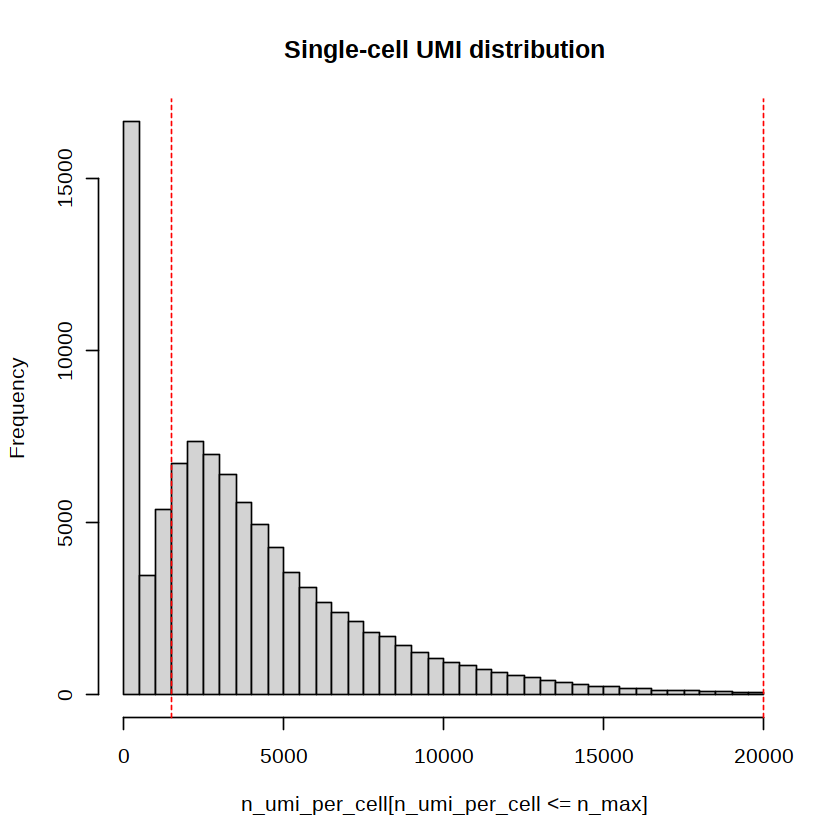

In [9]:
n_umi_per_cell = colSums(mat@mat)
n_min = 1500
n_max = 20000
hist(n_umi_per_cell[n_umi_per_cell <= n_max],breaks = seq(0,n_max,length.out = 41), main = "Single-cell UMI distribution")
abline(v = n_min,col = "red",lty = "dashed")
abline(v = n_max,col = "red",lty = "dashed")
message(paste0(sum(n_umi_per_cell < n_min), " cells with <",n_min," UMIs"))
message(paste0(sum(n_umi_per_cell > n_max), " cells with >",n_max," UMIs"))


[1] 58

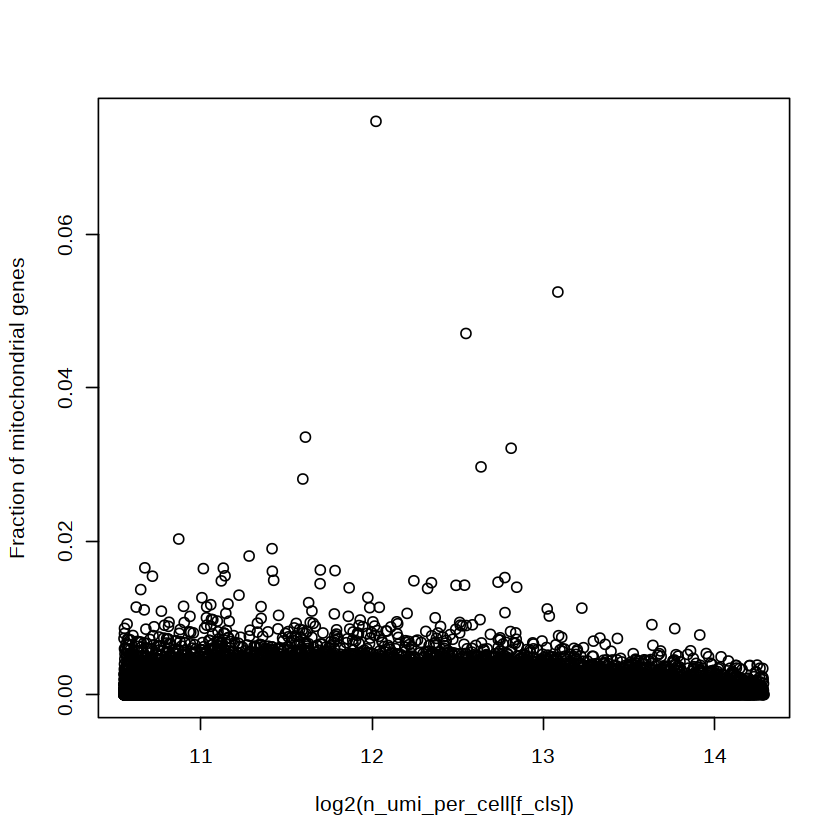

In [10]:
small_cells = colnames(mat@mat)[n_umi_per_cell < n_min]
large_cells = colnames(mat@mat)[n_umi_per_cell > n_max]

f_cls = n_umi_per_cell <= n_max & n_umi_per_cell >= n_min

fr_excl = colSums(mat@ignore_gmat)/colSums(mat@mat)

plot(x = log2(n_umi_per_cell[f_cls]),y = fr_excl[f_cls],ylab = "Fraction of mitochondrial genes")

sum(fr_excl[f_cls] > 0.01)

In [11]:
cells_large_fr = colnames(mat@mat)[fr_excl > 0.01]

mat = scm_ignore_cells(scmat = mat,ig_cells = unique(c(small_cells,large_cells,cells_large_fr)))
message(paste0("excluded ",length(unique(c(small_cells,large_cells,cells_large_fr)))," cells"))

excluded 26007 cells



In [12]:
files_with_metadata = list.files(path = "data/mars_seq_plate_metadata/")

files_with_metadata = intersect(files_with_metadata,paste(metadata$Plate,".tsv",sep=""))

extra_cell_metadata = data.frame()

for (plate_id in files_with_metadata) {
  print(plate_id)
  extra_cell_metadata_temp = read.table(paste("data/mars_seq_plate_metadata/",plate_id,sep = ""),
                                        sep = "\t",h = T,stringsAsFactors = F)
  colnames(extra_cell_metadata_temp)[colnames(extra_cell_metadata_temp) == "dtomato_a"] = "tdtomato_a"
  #extra_cell_metadata = rbind(extra_cell_metadata,extra_cell_metadata_temp,fill = TRUE)
  extra_cell_metadata = bind_rows(extra_cell_metadata,extra_cell_metadata_temp)
}

#Next I remove the duplicate cells
duplicate_cells = names(table(extra_cell_metadata$cell)[table(extra_cell_metadata$cell) >1])
tot_number_of_duplicates = sum(table(extra_cell_metadata$cell)[table(extra_cell_metadata$cell) >1]) - length(duplicate_cells)

message(tot_number_of_duplicates," wells with duplicated cells")

for (cell_id in duplicate_cells) {
  duplicates = which(extra_cell_metadata$cell == cell_id)
  # remove the first element from the duplicate list
  duplicates = duplicates[-1]
  extra_cell_metadata = extra_cell_metadata[-duplicates,]
}

# Next add metadata to matrix
extra_cell_metadata$cell = paste(extra_cell_metadata$plate,extra_cell_metadata$cell,sep=".")

temp = mat@cell_metadata
temp$cell = rownames(temp)
col_f = setdiff(colnames(temp),setdiff(colnames(extra_cell_metadata),c("cell")))
temp = temp[,col_f]



#temp$cell = names(temp$Plate)
temp = left_join(temp,extra_cell_metadata,by="cell")
rownames(temp) = temp$cell

message("In total ",sum(is.na(temp$embryo)), " nonannotated wells")
table(as.character(mat@cell_metadata$Plate[is.na(temp$embryo)]))

cls_f = temp$cell[!is.na(temp$embryo)]
f = temp[cls_f,"embryo"] == ""
temp[cls_f[f],"embryo"] = "empty"



[1] "181209_P01.tsv"
[1] "181209_P03.tsv"
[1] "181209_P04.tsv"
[1] "190214_P01.tsv"
[1] "190214_P02.tsv"
[1] "190214_P03.tsv"
[1] "190214_P04.tsv"
[1] "190214_P05.tsv"
[1] "190223_P01.tsv"
[1] "190223_P02.tsv"
[1] "190223_P03.tsv"
[1] "190223_P04.tsv"
[1] "190223_P05.tsv"
[1] "190223_P06.tsv"
[1] "190223_P07.tsv"
[1] "190223_P08.tsv"
[1] "190223_P09.tsv"
[1] "190223_P10.tsv"
[1] "190304_P01.tsv"
[1] "190304_P02.tsv"
[1] "190304_P03.tsv"
[1] "190307_P09.tsv"
[1] "190307_P10.tsv"
[1] "190307_P11.tsv"
[1] "190307_P12.tsv"
[1] "190307_P13.tsv"
[1] "190307_P14.tsv"
[1] "190307_P15.tsv"
[1] "190307_P16.tsv"
[1] "190311_P01.tsv"
[1] "190311_P02.tsv"
[1] "190311_P03.tsv"
[1] "190313_P01.tsv"
[1] "190313_P02.tsv"
[1] "190313_P03.tsv"
[1] "190313_P04.tsv"
[1] "190313_P05.tsv"
[1] "190313_P06.tsv"
[1] "190313_P07.tsv"
[1] "190313_P08.tsv"
[1] "190313_P09.tsv"
[1] "190313_P10.tsv"
[1] "190313_P11.tsv"
[1] "190313_P12.tsv"
[1] "190313_P13.tsv"
[1] "190313_P14.tsv"
[1] "190313_P15.tsv"
[1] "190313_P

197 wells with duplicated cells

In total 384 nonannotated wells




EXE24_P3 
     384 

In [13]:
# Manual annotation of Plate EXE24_P3
cls_exe24 = temp$cell[temp$Plate == "EXE24_P3"]
  
empty_wells = c("C1","C2","D1","D2","J6","J7","K6","K7","O23","O24","P23","P24")
  
temp[cls_exe24,"embryo"] = "EXE24_m1e2"
empty_cls = cls_exe24[temp[cls_exe24,"coordinates"] %in% empty_wells]
temp[empty_cls,"embryo"] = "empty"
message("In total ",sum(is.na(temp$embryo)), " nonannotated wells")

In total 0 nonannotated wells



In [14]:
mat@cell_metadata = temp

cells_ignore_embryos = colnames(mat@mat)[mat@cell_metadata[colnames(mat@mat),"embryo"] %in% ignore_embryos]

new_ignore_cells = union(mat@ignore_cells,rownames(mat@cell_metadata)[mat@cell_metadata[,"embryo"]== "empty"])
new_ignore_cells = union(new_ignore_cells,duplicate_cells)
new_ignore_cells = union(new_ignore_cells,cells_ignore_embryos)
mat = scm_ignore_cells(scmat = mat,ig_cells = new_ignore_cells)

In [15]:
scdb_add_mat(id = mat_name,mat = mat)

In [16]:
table(mat@cell_metadata$embryo)


         181209_R_1         181209_R_11         181209_R_12         181209_R_13 
                110                  28                  38                 111 
        181209_R_14         181209_R_15         181209_R_16          181209_R_2 
                 73                  78                  85                 191 
         181209_R_3          181209_R_5          181209_R_7       190214_P02_B1 
                 67                 109                 196                 677 
      190214_P05_B3         190214_R_A1         190214_R_A2         190214_R_B6 
                 63                  72                 299                 681 
      190223_P10_a3         190223_R_a1         190223_R_a2         190223_R_a4 
                292                 372                 472                 707 
        190223_R_a6         190223_R_b2         190223_R_b3     190304_TKO_1_P6 
                789                 743                 261                 131 
      190304_W_wt01       1

#### There are a few E8.5 embryos for which the placenta was dissected from the embryo and then sorted separately. 
The placenta part of those embryos contains the word placenta in it. 

In [17]:
mat = scdb_mat("embexe_with_e45")

In [27]:
md = mat@cell_metadata

In [28]:
md$embryo_with_placenta_information = md$embryo

In [29]:
grep("placenta",unique(md$embryo),v = T)

[1] "EXE18_placenta_e1"   "EXE18_placenta_e2"   "EXE18_placenta_e4"  
 [4] "EXE19_M1E2_placenta" "EXE19_M1E4_placenta" "EXE19_M1E5_placenta"
 [7] "EXE22_placenta_e1"   "EXE22_placenta_e5"   "EXE22_e2_placenta"  
[10] "EXE22_placenta_e3"   "EXE28_e1_placenta"   "EXE28_e3_placenta"  
[13] "EXE28_e2_placenta"

In [30]:
tmp_ind = grep("placenta",md$embryo)

In [31]:
embryo_name_mod = gsub(pattern = "_placenta",replacement = "",md$embryo)

In [32]:
unique(embryo_name_mod[tmp_ind])

[1] "EXE18_e1"   "EXE18_e2"   "EXE18_e4"   "EXE19_M1E2" "EXE19_M1E4"
 [6] "EXE19_M1E5" "EXE22_e1"   "EXE22_e5"   "EXE22_e2"   "EXE22_e3"  
[11] "EXE28_e1"   "EXE28_e3"   "EXE28_e2"

In [33]:
md$embryo = embryo_name_mod

In [34]:
mat@cell_metadata = md

In [35]:
scdb_add_mat(id = "embexe_with_e45",mat = mat)

#### We create in addition a single-cell matrix without the cells from E4.5 embryos
Those are all the cells from the two plates *EXE26_P1* and *EXE27_P1*

In [36]:
mat = scdb_mat("embexe_with_e45")

In [37]:
ignore_cells = colnames(mat@mat)[ mat@cell_metadata[colnames(mat@mat),"Plate"] %in% c("EXE26_P1","EXE27_P1")]
ignore_cells

[1] "EXE26_P1.EXE26_P1001" "EXE26_P1.EXE26_P1007" "EXE26_P1.EXE26_P1011"
  [4] "EXE26_P1.EXE26_P1012" "EXE26_P1.EXE26_P1020" "EXE26_P1.EXE26_P1032"
  [7] "EXE26_P1.EXE26_P1035" "EXE26_P1.EXE26_P1036" "EXE26_P1.EXE26_P1039"
 [10] "EXE26_P1.EXE26_P1041" "EXE26_P1.EXE26_P1042" "EXE26_P1.EXE26_P1043"
 [13] "EXE26_P1.EXE26_P1045" "EXE26_P1.EXE26_P1053" "EXE26_P1.EXE26_P1054"
 [16] "EXE26_P1.EXE26_P1055" "EXE26_P1.EXE26_P1056" "EXE26_P1.EXE26_P1058"
 [19] "EXE26_P1.EXE26_P1059" "EXE26_P1.EXE26_P1060" "EXE26_P1.EXE26_P1064"
 [22] "EXE26_P1.EXE26_P1068" "EXE26_P1.EXE26_P1069" "EXE26_P1.EXE26_P1074"
 [25] "EXE26_P1.EXE26_P1075" "EXE26_P1.EXE26_P1077" "EXE26_P1.EXE26_P1078"
 [28] "EXE26_P1.EXE26_P1080" "EXE26_P1.EXE26_P1081" "EXE26_P1.EXE26_P1083"
 [31] "EXE26_P1.EXE26_P1084" "EXE26_P1.EXE26_P1090" "EXE26_P1.EXE26_P1095"
 [34] "EXE26_P1.EXE26_P1097" "EXE26_P1.EXE26_P1098" "EXE26_P1.EXE26_P1100"
 [37] "EXE26_P1.EXE26_P1101" "EXE26_P1.EXE26_P1102" "EXE26_P1.EXE26_P1103"
 [40] "EXE26_P1.EXE26_P1104" "EXE26_P1.EXE26_P1107" "EXE26_P1.EXE26_P1110"
 [43] "EXE26_P1.EXE26_P1111" "EXE26_P1.EXE26_P1113" "EXE26_P1.EXE26_P1115"
 [46] "EXE26_P1.EXE26_P1116" "EXE26_P1.EXE26_P1117" "EXE26_P1.EXE26_P1118"
 [49] "EXE26_P1.EXE26_P1122" "EXE26_P1.EXE26_P1124" "EXE26_P1.EXE26_P1125"
 [52] "EXE26_P1.EXE26_P1126" "EXE26_P1.EXE26_P1127" "EXE26_P1.EXE26_P1128"
 [55] "EXE26_P1.EXE26_P1131" "EXE26_P1.EXE26_P1132" "EXE26_P1.EXE26_P1135"
 [58] "EXE26_P1.EXE26_P1137" "EXE26_P1.EXE26_P1139" "EXE26_P1.EXE26_P1143"
 [61] "EXE26_P1.EXE26_P1146" "EXE26_P1.EXE26_P1150" "EXE26_P1.EXE26_P1152"
 [64] "EXE26_P1.EXE26_P1156" "EXE26_P1.EXE26_P1158" "EXE26_P1.EXE26_P1162"
 [67] "EXE26_P1.EXE26_P1165" "EXE26_P1.EXE26_P1166" "EXE26_P1.EXE26_P1170"
 [70] "EXE26_P1.EXE26_P1173" "EXE26_P1.EXE26_P1177" "EXE26_P1.EXE26_P1178"
 [73] "EXE26_P1.EXE26_P1181" "EXE26_P1.EXE26_P1185" "EXE27_P1.EXE27_P1011"
 [76] "EXE27_P1.EXE27_P1084" "EXE27_P1.EXE27_P1085" "EXE27_P1.EXE27_P1095"
 [79] "EXE27_P1.EXE27_P1097" "EXE27_P1.EXE27_P1099" "EXE27_P1.EXE27_P1100"
 [82] "EXE27_P1.EXE27_P1103" "EXE27_P1.EXE27_P1105" "EXE27_P1.EXE27_P1109"
 [85] "EXE27_P1.EXE27_P1111" "EXE27_P1.EXE27_P1115" "EXE27_P1.EXE27_P1116"
 [88] "EXE27_P1.EXE27_P1119" "EXE27_P1.EXE27_P1120" "EXE27_P1.EXE27_P1121"
 [91] "EXE27_P1.EXE27_P1123" "EXE27_P1.EXE27_P1125" "EXE27_P1.EXE27_P1126"
 [94] "EXE27_P1.EXE27_P1132" "EXE27_P1.EXE27_P1135" "EXE27_P1.EXE27_P1137"
 [97] "EXE27_P1.EXE27_P1139" "EXE27_P1.EXE27_P1140" "EXE27_P1.EXE27_P1146"
[100] "EXE27_P1.EXE27_P1148" "EXE27_P1.EXE27_P1153" "EXE27_P1.EXE27_P1155"
[103] "EXE27_P1.EXE27_P1156" "EXE27_P1.EXE27_P1158" "EXE27_P1.EXE27_P1162"
[106] "EXE27_P1.EXE27_P1166" "EXE27_P1.EXE27_P1169" "EXE27_P1.EXE27_P1171"
[109] "EXE27_P1.EXE27_P1174" "EXE27_P1.EXE27_P1175" "EXE27_P1.EXE27_P1177"
[112] "EXE27_P1.EXE27_P1180" "EXE27_P1.EXE27_P1182" "EXE27_P1.EXE27_P1183"
[115] "EXE27_P1.EXE27_P1187" "EXE27_P1.EXE27_P1188" "EXE27_P1.EXE27_P1190"
[118] "EXE27_P1.EXE27_P1191" "EXE27_P1.EXE27_P1192"

In [38]:
mat_new = scm_ignore_cells(scmat = mat,ig_cells = c(mat@ignore_cells,ignore_cells))

In [39]:
scdb_add_mat(id = "embexe",mat = mat_new)